In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from google.colab import drive
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

In [0]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)

In [216]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/data.csv"

In [0]:
df = pd.read_csv(path)

In [219]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 155
Total number of columns in dataset = 5


In [220]:
df.head()

,X1,X2,X3,X4,Y
0,2.53,285,62.750,1394.46,1187.0
1,2.85,280,37.875,1366.42,1149.1
2,2.27,266,44.000,1498.58,1268.3
3,2.43,280,59.250,1420.60,1124.9
4,2.46,281,23.938,1454.60,1194.5


In [0]:
# Split df into x and Y
target_col = "Y"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [222]:
X.shape

(155, 4)

In [223]:
y.shape

(155,)

In [0]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [225]:
X_train.head()

,X1,X2,X3,X4
141,2.12,236,15.778,2471.65
66,4.55,328,13.375,1549.38
119,0.74,335,15.610,1848.36
27,3.79,436,8.000,841.15
79,0.70,620,86.625,872.81


In [0]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X_train, y_train)

In [227]:
X_new[0:5]

array([[ 236.  , 2471.65],
       [ 328.  , 1549.38],
       [ 335.  , 1848.36],
       [ 436.  ,  841.15],
       [ 620.  ,  872.81]])

# Relationship of Features with Response Variables

In [0]:
def plot_join_plot(df, feature, target):
    j = sns.jointplot(feature, target, data = df, kind = 'reg')
    j.annotate(stats.pearsonr)
    return plt.show()

In [0]:
train_df = pd.concat([X_train, y_train], axis=1)

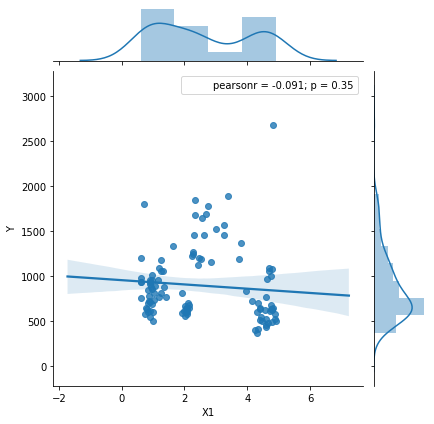

In [230]:
plot_join_plot(train_df, "X1", target_col)

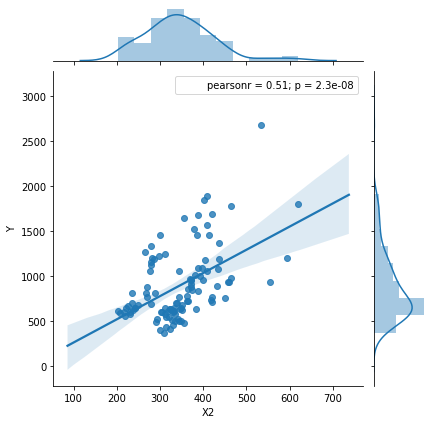

In [231]:
plot_join_plot(train_df, "X2", target_col)

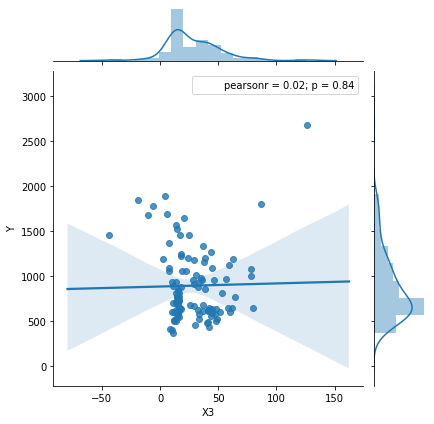

In [232]:
plot_join_plot(train_df, "X3", target_col)

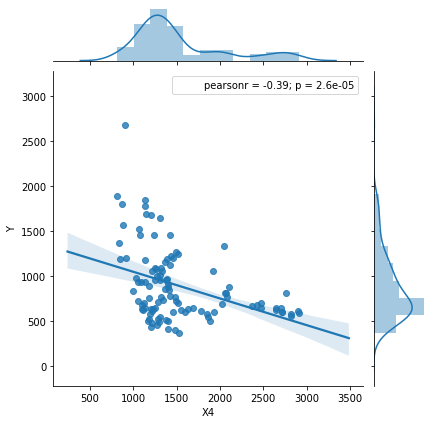

In [233]:
plot_join_plot(train_df, "X4", target_col)

# Correlation Analysis using Pearson Analysis

In [234]:
pearsonr(X_train["X4"], y_train)

(-0.3925245911796265, 2.649328996655491e-05)

In [0]:
out_list = []
for column in X_train.columns:
    corr_tuple = pearsonr(X_train[column], y_train)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

In [0]:
corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])

In [237]:
corr_df.head()

,Features,Correlation,P-Value
0,X1,-0.091239,3.476728e-01
1,X2,0.506263,2.274708e-08
2,X3,0.019741,8.393037e-01
3,X4,-0.392525,2.649329e-05


In [0]:
corr_df.sort_values(by=['P-Value'], inplace=True)

In [239]:
corr_df.head()

,Features,Correlation,P-Value
1,X2,0.506263,2.274708e-08
3,X4,-0.392525,2.649329e-05
0,X1,-0.091239,3.476728e-01
2,X3,0.019741,8.393037e-01
